**Лабораторна робота 1.1**

**студента групи ФІТ 4-4**

**Сакуна Владислава Олександровича**

Тема: Візуалізація Matplotlib


За посиланням https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

Скачати файл Most Streamed Spotify Songs 2023 і виконати для нього наступні завдання.


**Завдання 1.** Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань. Побудувати кругову діаграму для тих самих даних.

<ipython-input-1-50239d09bd0d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_songs['streams'] = top_10_songs['streams'].str.extract('(\d+)').astype(float)


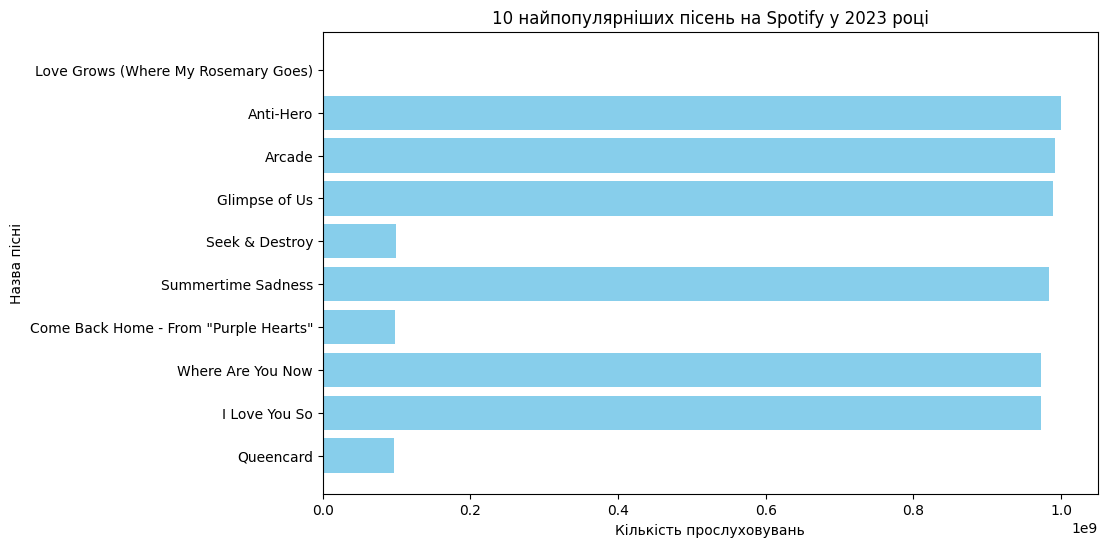

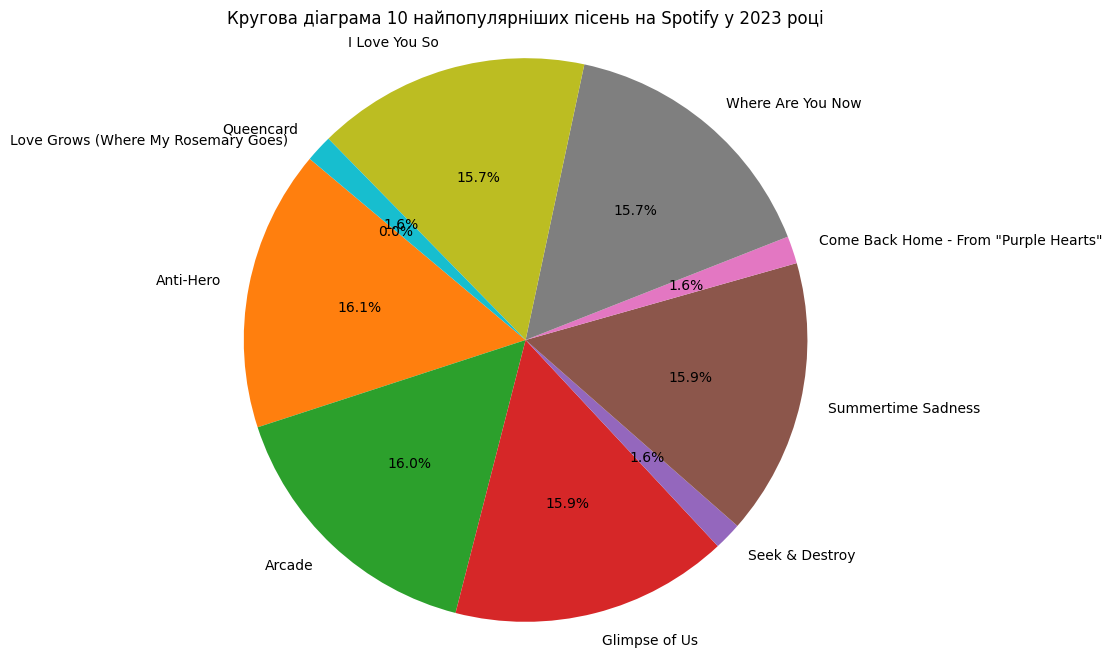

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sample_data/spotify-2023.csv', encoding='latin-1')
sorted_data = data.sort_values(by='streams', ascending=False)
top_10_songs = sorted_data.head(10)

top_10_songs['streams'] = top_10_songs['streams'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва пісні')
plt.title('10 найпопулярніших пісень на Spotify у 2023 році')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(top_10_songs['streams'], labels=top_10_songs['track_name'], autopct='%1.1f%%', startangle=140)
plt.title('Кругова діаграма 10 найпопулярніших пісень на Spotify у 2023 році')
plt.axis('equal')
plt.show()

**Завдання 2.** Створіть кругову діаграму або секторну діаграму, яка відображає розподіл за danceability серед найпопулярніших пісень у 2023 році.

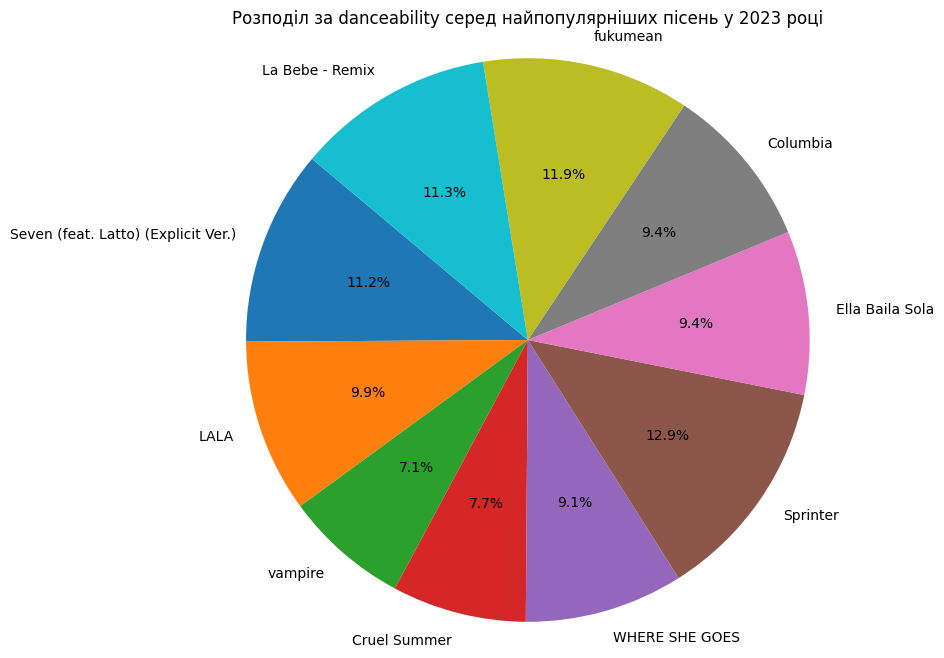

In [2]:
top_songs = data.head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_songs['danceability_%'], labels=top_songs['track_name'], autopct='%1.1f%%', startangle=140)
plt.title('Розподіл за danceability серед найпопулярніших пісень у 2023 році')
plt.axis('equal')
plt.show()

**Завдання 3.** Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.

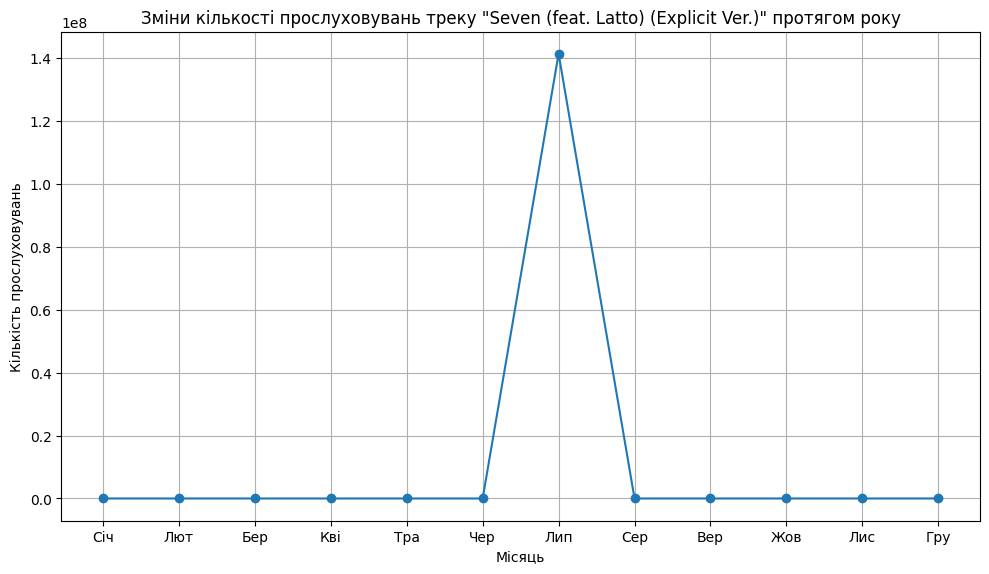

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/sample_data/spotify-2023.csv', encoding='latin-1')

track_data = data[data['track_name'] == 'Seven (feat. Latto) (Explicit Ver.)']

monthly_streams = track_data.groupby(['released_month'])['streams'].sum()
all_months = list(range(1, 13))
monthly_streams = monthly_streams.reindex(all_months, fill_value=0)

plt.figure(figsize=(10, 6))
plt.plot(monthly_streams.index, monthly_streams.values, marker='o', linestyle='-')
plt.title('Зміни кількості прослуховувань треку "Seven (feat. Latto) (Explicit Ver.)" протягом року')
plt.xlabel('Місяць')
plt.ylabel('Кількість прослуховувань')
plt.xticks(range(1, 13), ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер', 'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру'])
plt.grid(True)
plt.tight_layout()
plt.show()

**Завдання 4.** Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів.

Тип даних у серії top_artists: object


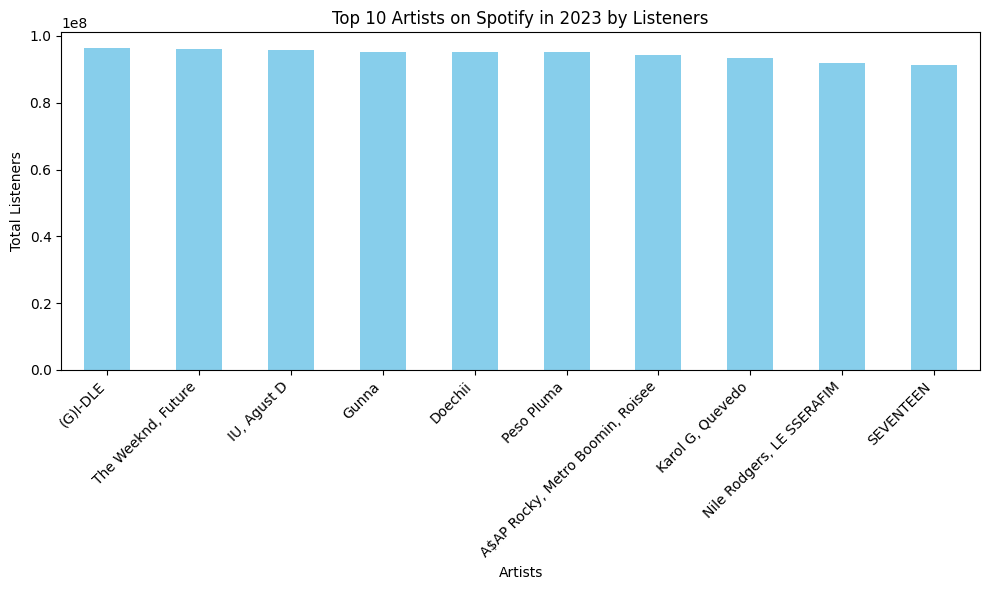

In [4]:
data_2023 = data[data['released_year'] == 2023]

top_artists = data_2023.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)
print("Тип даних у серії top_artists:", top_artists.dtype)

if not pd.api.types.is_numeric_dtype(top_artists):
    top_artists = top_artists.astype(float)

plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artists on Spotify in 2023 by Listeners')
plt.xlabel('Artists')
plt.ylabel('Total Listeners')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Завдання 5.** Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

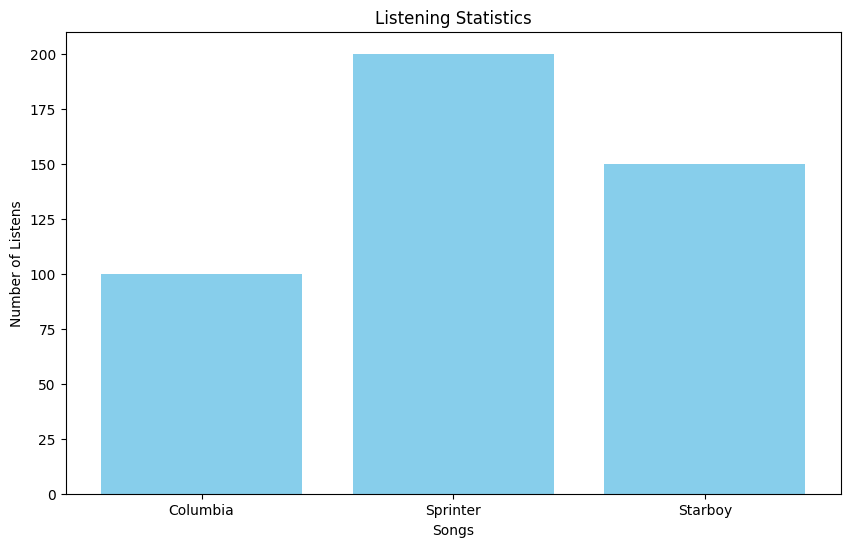

In [5]:
songs = ['Columbia', 'Sprinter', 'Starboy']
listens = [100, 200, 150]

plt.figure(figsize=(10, 6))
plt.bar(songs, listens, color='skyblue')
plt.title('Listening Statistics')
plt.xlabel('Songs')
plt.ylabel('Number of Listens')
plt.show()